# Data Understanding 

In [1]:
import pandas as pd

# Load the CSV file
file_path = '/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182338 entries, 0 to 182337
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             182338 non-null  object 
 1   date                182338 non-null  object 
 2   avg_temp_c          181114 non-null  float64
 3   min_temp_c          176452 non-null  float64
 4   max_temp_c          174845 non-null  float64
 5   precipitation_mm    112594 non-null  float64
 6   snow_depth_mm       12238 non-null   float64
 7   avg_wind_dir_deg    146944 non-null  float64
 8   avg_wind_speed_kmh  159866 non-null  float64
dtypes: float64(7), object(2)
memory usage: 12.5+ MB


In [4]:
data.describe()

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
count,181114.000000,176452.000000,174845.000000,112594.000000,12238.000000,146944.000000,159866.000000
mean,19.137516,14.627775,23.887261,3.679964,342.481696,175.650289,11.281875
std,9.902722,10.004998,10.446670,11.294167,1020.265388,105.435150,6.132884
min,-34.700000,-43.800000,-28.500000,0.000000,0.000000,0.000000,0.000000
25%,12.400000,7.500000,17.100000,0.000000,0.000000,83.000000,7.200000
50%,21.400000,16.200000,27.000000,0.000000,10.000000,178.000000,9.900000
75%,27.100000,23.300000,31.500000,2.300000,140.000000,266.000000,14.000000
max,41.900000,38.900000,49.100000,496.100000,7140.000000,360.000000,80.000000


## Distribution of features using histograms

array([[<Axes: title={'center': 'avg_temp_c'}>,
        <Axes: title={'center': 'min_temp_c'}>,
        <Axes: title={'center': 'max_temp_c'}>],
       [<Axes: title={'center': 'precipitation_mm'}>,
        <Axes: title={'center': 'snow_depth_mm'}>,
        <Axes: title={'center': 'avg_wind_dir_deg'}>],
       [<Axes: title={'center': 'avg_wind_speed_kmh'}>, <Axes: >,
        <Axes: >]], dtype=object)

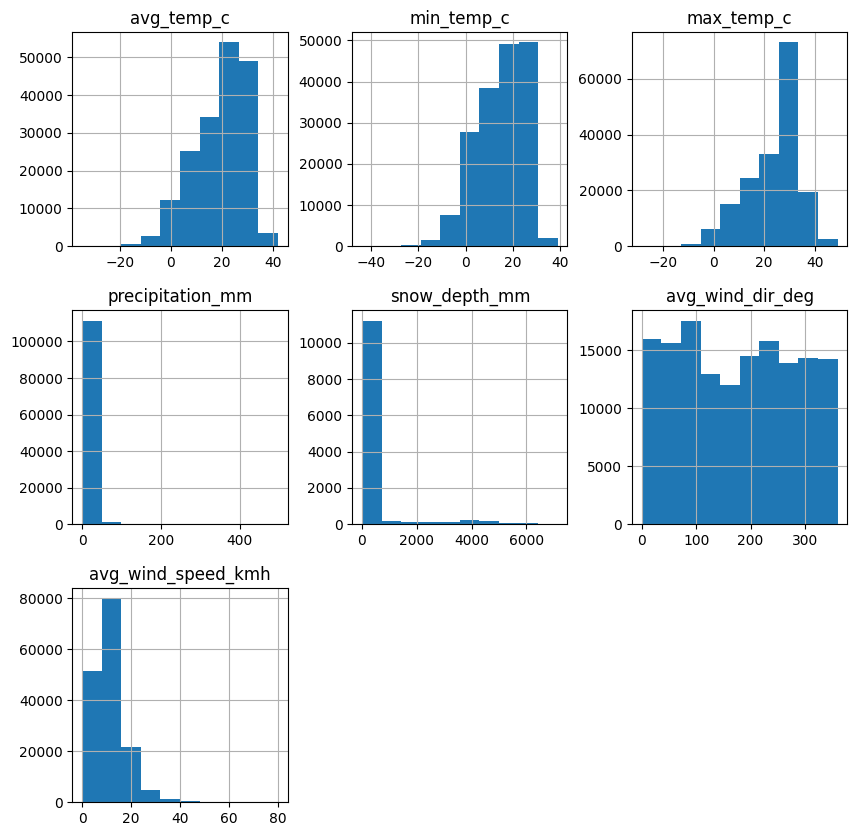

In [9]:
data.hist(figsize=(10,10))

# Data Preprocessing

In [2]:
# Convert date column to datetime and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data

,city_id,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
date,,,,,,,,
2014-01-01,C001,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
2014-01-02,C001,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2014-01-03,C001,7.6,1.9,14.0,NaN,NaN,NaN,5.8
2014-01-04,C001,7.6,3.9,13.3,NaN,NaN,291.0,11.3
2014-01-05,C001,8.6,0.5,16.9,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...
2018-12-27,C112,22.0,15.9,27.9,0.0,NaN,100.0,13.2
2018-12-28,C112,21.9,14.9,28.2,0.0,NaN,91.0,12.6
2018-12-29,C112,22.4,16.3,28.2,0.0,NaN,61.0,14.2


In [88]:
data[['city_id','avg_temp_c']]

,city_id,avg_temp_c
date,,
2014-01-01,C001,6.6
2014-01-02,C001,9.3
2014-01-03,C001,7.6
2014-01-04,C001,7.6
2014-01-05,C001,8.6
...,...,...
2018-12-27,C112,22.0
2018-12-28,C112,21.9
2018-12-29,C112,22.4


In [86]:
data.isnull().sum()

city_id                    0
avg_temp_c              1224
min_temp_c              5886
max_temp_c              7493
precipitation_mm       69744
snow_depth_mm         170100
avg_wind_dir_deg       35394
avg_wind_speed_kmh     22472
dtype: int64

## Handling null values

In [140]:
# # # Define a function to fill NaNs with the rolling mean of the previous 3 days
# # def fill_na_with_rolling_mean(group):
# #     group['avg_temp_c'] = group['avg_temp_c'].fillna(group['avg_temp_c'].rolling(3, min_periods=1).mean())
# #     return group

# df = data[['city_id','avg_temp_c']]

# # Sort the DataFrame by city_id and date
# df = df.sort_values(by=['city_id', 'date'])

# # Define a function to fill NaNs with the rolling mean of the previous 3 days
# def fill_na_with_rolling_mean(group):
#     group['avg_temp_c'] = group['avg_temp_c'].fillna(group['avg_temp_c'].rolling(3, min_periods=1).mean())
#     return group

# # Apply the function to each city group without including the grouping columns
# df = df.groupby('city_id', group_keys=False).apply(fill_na_with_rolling_mean)

# # Reset the index if needed
# df = df.reset_index(drop=True)

## Calculating the average temperature using min_temp_c and max_temp_c for rows where avg_temp_c is null


In [3]:
# Calculate the average temperature using min_temp_c and max_temp_c for rows where avg_temp_c is null
weather_data = data

missing_avg_temp = weather_data['avg_temp_c'].isnull()

# Compute the average temperature for the missing values
calculated_avg_temp = (weather_data.loc[missing_avg_temp, 'min_temp_c'] + weather_data.loc[missing_avg_temp, 'max_temp_c']) / 2

# Fill the missing values in avg_temp_c with the calculated average temperature
weather_data.loc[missing_avg_temp, 'avg_temp_c'] = calculated_avg_temp

# Verify that there are no more null values in the avg_temp_c column
null_values_remaining = weather_data['avg_temp_c'].isnull().sum()
null_values_remaining

25

In [103]:
weather_data.isnull().sum()

city_id                    0
avg_temp_c                25
min_temp_c              5886
max_temp_c              7493
precipitation_mm       69744
snow_depth_mm         170100
avg_wind_dir_deg       35394
avg_wind_speed_kmh     22472
dtype: int64

## Creating a pivot table for average temperature for each date and city

In [4]:
avg_temp = weather_data.groupby(['date', 'city_id'])['avg_temp_c'].sum().unstack(fill_value=0)
avg_temp

city_id,C001,C002,C003,C004,C005,C007,C008,C009,C010,C011,...,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,6.6,16.6,25.8,-4.7,22.1,20.7,5.1,18.7,0.0,1.7,...,11.1,29.8,5.3,19.1,6.7,21.3,5.2,26.4,26.1,0.0
2014-01-02,9.3,16.0,25.8,-4.2,25.4,21.8,5.7,19.6,0.0,3.6,...,8.2,29.9,4.6,19.4,7.6,21.1,5.6,26.2,25.9,0.0
2014-01-03,7.6,16.7,26.8,-5.5,26.2,17.9,4.1,18.9,18.6,0.7,...,8.9,29.9,2.8,19.7,9.2,22.7,7.3,26.7,26.1,0.0
2014-01-04,7.6,18.2,26.1,-5.5,29.3,20.6,7.7,18.7,15.7,2.5,...,8.0,29.8,2.1,21.1,8.4,27.2,3.7,26.3,26.2,0.0
2014-01-05,8.6,16.7,26.1,4.9,24.4,23.7,8.0,19.6,16.3,3.2,...,6.6,29.7,2.5,19.7,6.2,24.0,4.0,26.8,26.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,9.7,14.8,27.6,0.1,24.7,22.2,6.9,19.8,21.0,0.4,...,6.9,28.5,4.7,20.6,6.9,20.9,4.4,26.6,26.9,22.0
2018-12-28,10.1,14.7,26.6,-2.7,25.7,24.1,1.5,17.4,19.2,0.7,...,6.3,29.4,1.3,20.6,10.7,22.2,4.6,25.8,27.0,21.9
2018-12-29,8.9,13.3,26.9,-6.6,23.0,17.6,0.8,18.1,17.2,1.2,...,7.1,29.1,3.7,20.7,8.5,19.8,4.6,27.1,27.4,22.4


## Data Scaling

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = StandardScaler()
scaled_data = scaler.fit_transform(avg_temp)

In [6]:
scaled_data

array([[-1.34558036, -0.57590136,  0.06738871, ...,  0.75643802,
        -0.32266421, -4.42859976],
       [-0.97099508, -0.68882845,  0.06738871, ...,  0.66240787,
        -0.42788518, -4.42859976],
       [-1.20684507, -0.55708018,  0.48366676, ...,  0.89748324,
        -0.32266421, -4.42859976],
       ...,
       [-1.0264892 , -1.19700036,  0.52529456, ...,  1.08554353,
         0.36127212,  0.79715562],
       [-0.77676567, -1.159358  ,  0.8166892 , ...,  0.66240787,
         0.8347665 ,  0.6105215 ],
       [-0.62415685, -1.06525209,  0.60855017, ...,  1.46166411,
         0.72954553,  0.28391179]])

## Preprocessing for LSTM model

In [140]:
# Function to create sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

time_step = 7  # Example sequence length
X, y = create_sequences(scaled_data, time_step)

# Split the data into training and testing sets
train_size = int(len(X) * 0.9)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]
X_train.shape

(1636, 7, 100)

## LSTM model

Epoch 1/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3397 - val_loss: 0.0883
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0689 - val_loss: 0.0357
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0322 - val_loss: 0.0341
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - val_loss: 0.0291
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - val_loss: 0.0265
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0205 - val_loss: 0.0267
Epoch 7/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199 - val_loss: 0.0264
Epoch 8/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - val_loss: 0.0139
Epoch 9/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - val_loss: 0.0207
Epoch 10/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0157 - val_loss: 0.0132
Epoch 11/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - val_loss: 0.0141
Epoch 12/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

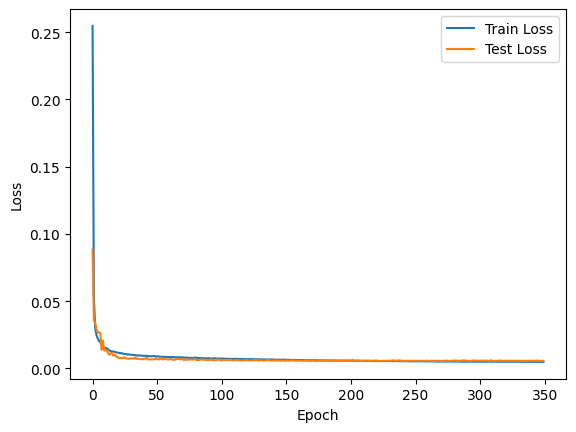

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, BatchNormalization, Bidirectional

# Build the LSTM model
model = Sequential([
    Input(shape=(time_step, X_train.shape[2])),
#     BatchNormalization(),
    LSTM(50, return_sequences=True),
    Dropout(0.1),
    
    BatchNormalization(),
    LSTM(40, return_sequences=False),
    Dropout(0.1),
    Dense(X_train.shape[2])
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, 
                    validation_split=0.1, 
                    epochs=1000, 
                    batch_size=50, 
                    verbose=1, 
                    callbacks=[early_stopping])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Acutal vs Prediction

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test set
test_predictions = model.predict(X_test)

# Inverse transform the test predictions and the actual test data
test_predictions = scaler.inverse_transform(test_predictions)
y_test_inverse = scaler.inverse_transform(y_test)

# Create a DataFrame for the actual test data
y_test_df = pd.DataFrame(y_test_inverse, columns=avg_temp.columns)

# Create a DataFrame for the predicted test data
test_predictions_df = pd.DataFrame(test_predictions, columns=avg_temp.columns)

# Flatten the actual and predicted data for comparison
actual_df = y_test_df.stack().reset_index()
actual_df.columns = ['date', 'city_id', 'actual_avg_temp']

predicted_df = test_predictions_df.stack().reset_index()
predicted_df.columns = ['date', 'city_id', 'predicted_avg_temp']

# Merge the actual and predicted data
comparison_df = pd.merge(actual_df, predicted_df, on=['city_id', 'date'])

# Add transaction date and store ID
comparison_df['date'] = avg_temp.index[-len(y_test_inverse):].repeat(len(avg_temp.columns)).values

# Add an ID column
comparison_df['submission_ID'] = comparison_df.index

# Format the final DataFrame
final_comparison_df = comparison_df[['submission_ID', 'city_id', 'date','actual_avg_temp', 'predicted_avg_temp']]

# Display the formatted DataFrame and RMSE
final_comparison_df

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


,submission_ID,city_id,date,actual_avg_temp,predicted_avg_temp
0,0,C001,2018-07-03,28.2,26.717667
1,1,C002,2018-07-03,26.3,24.972965
2,2,C003,2018-07-03,21.1,23.190760
3,3,C004,2018-07-03,20.2,15.890867
4,4,C005,2018-07-03,11.1,10.563747
...,...,...,...,...,...
18195,18195,C108,2018-12-31,24.9,24.321688
18196,18196,C109,2018-12-31,4.3,1.155692
18197,18197,C110,2018-12-31,26.2,27.052879
18198,18198,C111,2018-12-31,28.3,26.901188


## MAE and RMSE

In [143]:
mae = mean_absolute_error(comparison_df['actual_avg_temp'], comparison_df['predicted_avg_temp'])

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(comparison_df['actual_avg_temp'], comparison_df['predicted_avg_temp']))

print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Square Error (RMSE): 2.0223880609210303
Mean Absolute Error (MAE): 1.4566878684489568


# BILSTM

In [124]:
# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Example sequence length
X, y = create_sequences(scaled_data, seq_length)

Epoch 1/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.2115 - val_loss: 0.3236
Epoch 2/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0302 - val_loss: 0.1654
Epoch 3/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0216 - val_loss: 0.0728
Epoch 4/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0189 - val_loss: 0.0334
Epoch 5/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0167 - val_loss: 0.0181
Epoch 6/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0154 - val_loss: 0.0129
Epoch 7/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0137 - val_loss: 0.0119
Epoch 8/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0129 - val_loss: 0.0131
Epoch 9/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0125 - val_loss: 0.0113
Epoch 10/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0117 - val_loss: 0.0100
Epoch 11/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0113 - val_loss: 0.0102
Epoch 12/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

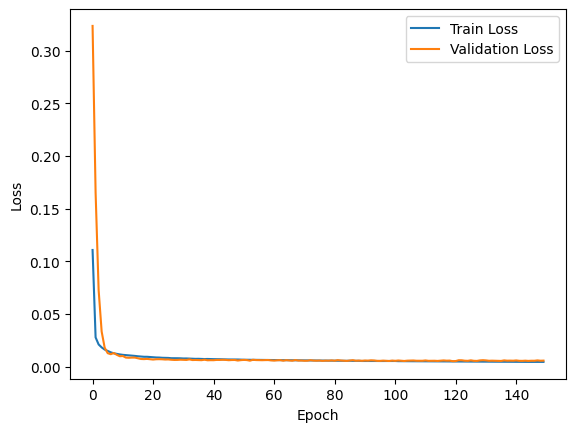

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, BatchNormalization, Bidirectional

# Build the BiLSTM model
model = Sequential([
    Input(shape=(time_step, X_train.shape[2])),
    Bidirectional(LSTM(50, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.1),
    Bidirectional(LSTM(40, return_sequences=False)),
#     BatchNormalization(),
    Dropout(0.1),
    Dense(X_train.shape[2])
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, 
                    validation_split=0.1, 
                    epochs=500, 
                    batch_size=32, 
                    verbose=1, 
                    callbacks=[early_stopping])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test set
test_predictions = model.predict(X_test)

# Inverse transform the test predictions and the actual test data
test_predictions = scaler.inverse_transform(test_predictions)
y_test_inverse = scaler.inverse_transform(y_test)

# Create a DataFrame for the actual test data
y_test_df = pd.DataFrame(y_test_inverse, columns=avg_temp.columns)

# Create a DataFrame for the predicted test data
test_predictions_df = pd.DataFrame(test_predictions, columns=avg_temp.columns)

# Flatten the actual and predicted data for comparison
actual_df = y_test_df.stack().reset_index()
actual_df.columns = ['date', 'city_id', 'actual_avg_temp']

predicted_df = test_predictions_df.stack().reset_index()
predicted_df.columns = ['date', 'city_id', 'predicted_avg_temp']

# Merge the actual and predicted data
comparison_df = pd.merge(actual_df, predicted_df, on=['city_id', 'date'])

# Add transaction date and store ID
comparison_df['date'] = avg_temp.index[-len(y_test_inverse):].repeat(len(avg_temp.columns)).values

# Add an ID column
comparison_df['submission_ID'] = comparison_df.index

# Format the final DataFrame
final_comparison_df = comparison_df[['submission_ID', 'city_id', 'date','actual_avg_temp', 'predicted_avg_temp']]

# Display the formatted DataFrame and RMSE
final_comparison_df

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


,submission_ID,city_id,date,actual_avg_temp,predicted_avg_temp
0,0,C001,2018-07-05,28.6,27.457575
1,1,C002,2018-07-05,26.8,25.122257
2,2,C003,2018-07-05,23.3,23.902039
3,3,C004,2018-07-05,17.8,15.965815
4,4,C005,2018-07-05,11.2,9.650750
...,...,...,...,...,...
17995,17995,C108,2018-12-31,24.9,22.291649
17996,17996,C109,2018-12-31,4.3,3.043990
17997,17997,C110,2018-12-31,26.2,26.340158
17998,17998,C111,2018-12-31,28.3,25.893236


In [127]:
mae = mean_absolute_error(comparison_df['actual_avg_temp'], comparison_df['predicted_avg_temp'])

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(comparison_df['actual_avg_temp'], comparison_df['predicted_avg_temp']))

print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Square Error (RMSE): 1.9177112105147749
Mean Absolute Error (MAE): 1.3921759564968759


## For a one City

In [134]:
# Filter for city 'C001'
city_df = final_comparison_df[final_comparison_df['city_id'] == 'C001']
city_df

,submission_ID,city_id,date,actual_avg_temp,predicted_avg_temp
0,0,C001,2018-07-05,28.6,27.457575
100,100,C001,2018-07-06,29.3,27.601749
200,200,C001,2018-07-07,27.9,26.538939
300,300,C001,2018-07-08,26.5,26.007080
400,400,C001,2018-07-09,21.6,24.897438
...,...,...,...,...,...
17500,17500,C001,2018-12-27,9.4,8.149345
17600,17600,C001,2018-12-28,9.7,9.182078
17700,17700,C001,2018-12-29,10.1,8.476334
17800,17800,C001,2018-12-30,8.9,8.213979


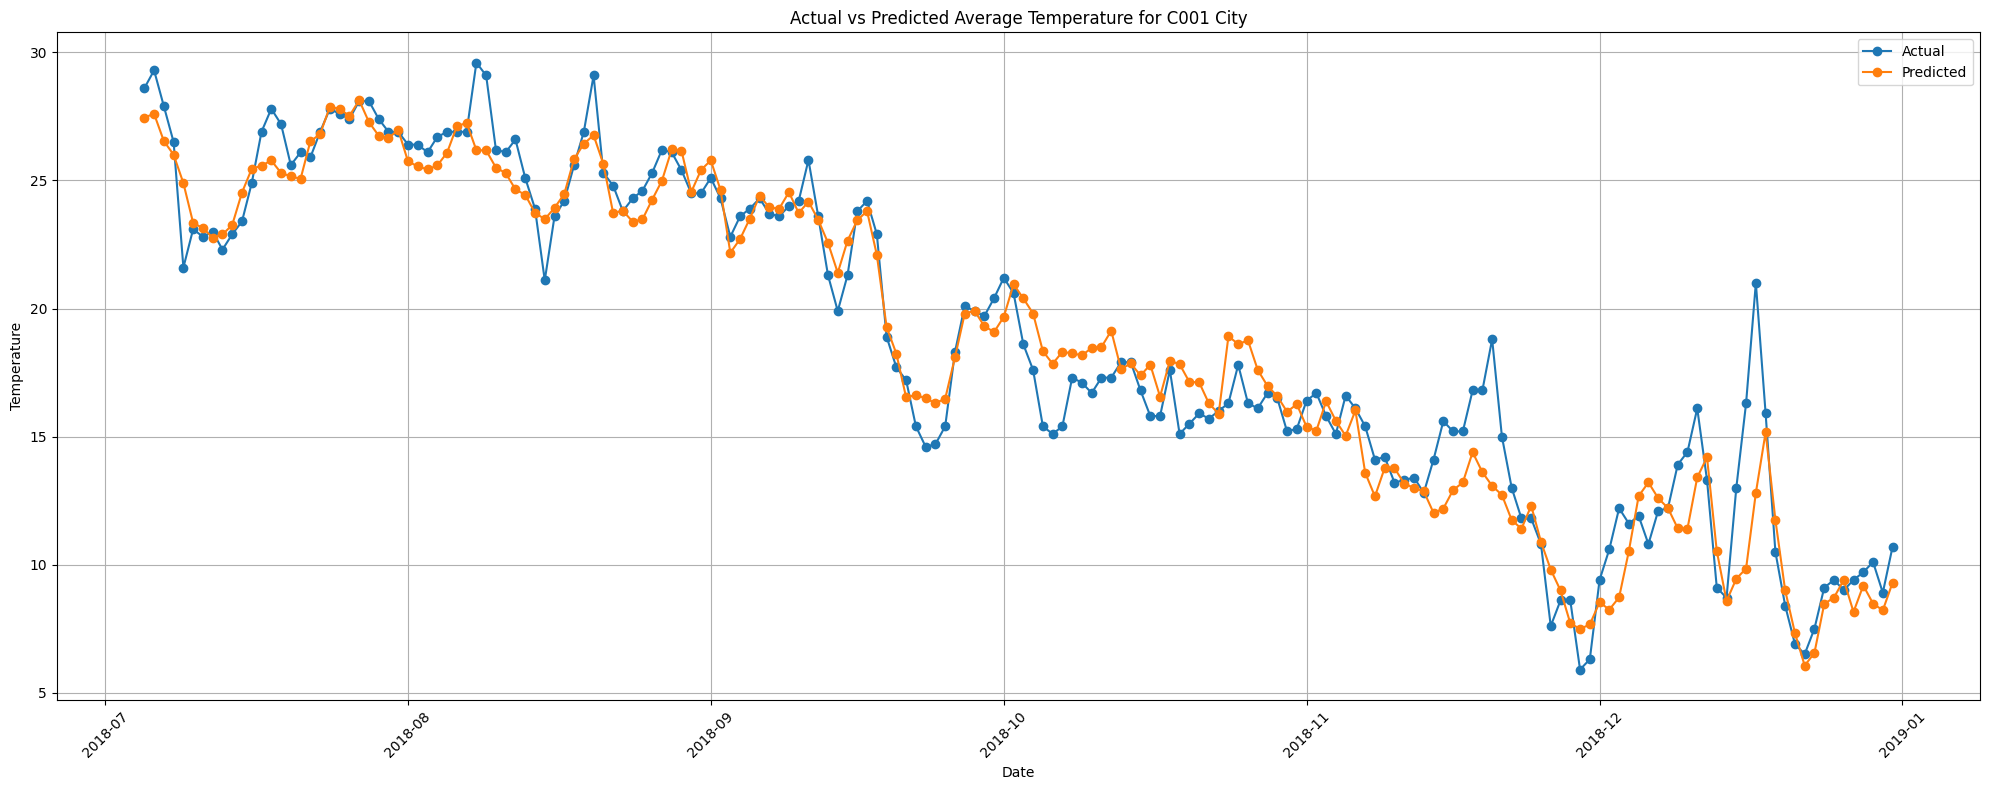

In [135]:
# Create the plot
plt.figure(figsize=(20, 8))
plt.plot(city_df['date'], city_df['actual_avg_temp'], label='Actual', marker='o')
plt.plot(city_df['date'], city_df['predicted_avg_temp'], label='Predicted', marker='o')

plt.title('Actual vs Predicted Average Temperature for C001 City')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [136]:
# Function to predict future temperature 
def predict_future(model, data, days=7):
    predictions = []
    current_step = data[-time_step:]
    for _ in range(days):
        pred = model.predict(current_step.reshape(1, time_step, -1))
        predictions.append(pred.flatten())
        current_step = np.append(current_step[1:], pred, axis=0)
    return np.array(predictions)

# Predict the next 7 days
future_predictions = predict_future(model, scaled_data)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(future_predictions)

# Create a DataFrame to format the predictions as required
prediction_dates = pd.date_range(start=avg_temp.index[-1] + pd.Timedelta(days=1), periods=7)
predictions_df = pd.DataFrame(future_predictions, columns=avg_temp.columns, index=prediction_dates)

# Flatten the predictions to match the desired format
flattened_predictions = predictions_df.stack().reset_index()
flattened_predictions.columns = ['date', 'city_id','avg_temp_c']

# Add the ID columns
flattened_predictions['submission_ID'] = flattened_predictions.index

# Reorder the columns to match the desired format
final_predictions = flattened_predictions[['submission_ID', 'date', 'city_id','avg_temp_c']]

# Display the final formatted predictions
final_predictions = final_predictions.sort_values(by=['city_id','date'])
final_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


,submission_ID,date,city_id,avg_temp_c
0,0,2019-01-01,C001,9.028045
100,100,2019-01-02,C001,7.704752
200,200,2019-01-03,C001,7.135831
300,300,2019-01-04,C001,7.068807
400,400,2019-01-05,C001,6.982656
...,...,...,...,...
299,299,2019-01-03,C112,20.359495
399,399,2019-01-04,C112,20.824448
499,499,2019-01-05,C112,20.990112
599,599,2019-01-06,C112,21.027864


In [137]:
final_predictions.head(20)

,submission_ID,date,city_id,avg_temp_c
0,0,2019-01-01,C001,9.028045
100,100,2019-01-02,C001,7.704752
200,200,2019-01-03,C001,7.135831
300,300,2019-01-04,C001,7.068807
400,400,2019-01-05,C001,6.982656
500,500,2019-01-06,C001,6.944827
600,600,2019-01-07,C001,7.054889
1,1,2019-01-01,C002,13.113548
101,101,2019-01-02,C002,12.851906
201,201,2019-01-03,C002,13.106411


In [138]:
# Create the final_predictions DataFrame
final_predictions = pd.DataFrame({
    'submission_ID': range(1, len(final_predictions) + 1),
    'avg_temp_c': final_predictions['avg_temp_c']
})

final_predictions

,submission_ID,avg_temp_c
0,1,9.028045
100,2,7.704752
200,3,7.135831
300,4,7.068807
400,5,6.982656
...,...,...
299,696,20.359495
399,697,20.824448
499,698,20.990112
599,699,21.027864


In [139]:
final_predictions.to_csv('predictions.csv', index=False)